In [16]:
#Graph with randomly assigned weights between the nodes
import networkx as nx
from random import randrange
import numpy as np
x,y = 0,0
G = nx.Graph()
p = 6
s = 1
nodes = range(1,p+1)
for n in nodes:
  G.add_node(n, pos = (x,y))
  if x < y or x == y :
    x += 1
  elif y < x :
    y += 1
  else:
    print("Something is wrong!")
i = 1
j = 1
while i <= G.number_of_nodes():
  while j <= G.number_of_nodes():
    if i != j:
      G.add_edge(i,j,weight = randrange(1,20))
    j += 1
  i += 1
  j = 1
routes = []

In [2]:
#Graph with weights being an euclidean distance between the nodes
import networkx as nx
from random import randrange
import numpy as np
x,y = 0,0
G = nx.Graph()
p = 6
s = 1
nodes = range(1,p+1)
for n in nodes:
  G.add_node(n, pos = (x,y))
  if x < y or x == y :
    x += 1
  elif y < x :
    y += 1
  else:
    print("Something is wrong!")
post = G.nodes(data = "pos")
i = 1
j = 1
while i <= G.number_of_nodes():
  while j <= G.number_of_nodes():
    if i != j:
      G.add_edge(i,j,weight = nx.generators.geometric.euclidean(post[i], post[j]))
    j += 1
  i += 1
  j = 1
routes = []

{(1, 2): Text(0.05405674509996958, -0.09664867689715162, '6'),
 (1, 3): Text(0.6512762267041807, -0.3402122935922022, '10'),
 (1, 4): Text(0.30056278455706514, -0.28271027592350284, '19'),
 (1, 5): Text(-0.2857151314830832, -0.08554186517785256, '3'),
 (1, 6): Text(-0.1150757180614082, -0.46318069401607587, '7'),
 (2, 3): Text(0.4027805183957889, 0.19728593231403846, '6'),
 (2, 4): Text(0.05206707624867338, 0.2547879499827378, '16'),
 (2, 5): Text(-0.534210839791475, 0.4519563607283881, '19'),
 (2, 6): Text(-0.3635714263698, 0.0743175318901648, '18'),
 (3, 4): Text(0.6492865578528845, 0.011224333287687231, '7'),
 (3, 5): Text(0.06300864181273613, 0.20839274403333752, '1'),
 (3, 6): Text(0.23364805523441112, -0.16924608480488576, '4'),
 (4, 5): Text(-0.2877048003343794, 0.26589476170203685, '5'),
 (4, 6): Text(-0.1170653869127044, -0.11174406713618644, '6'),
 (5, 6): Text(-0.7033433029528527, 0.08542434360946385, '10')}

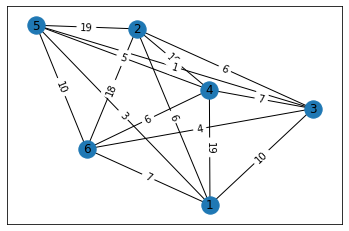

In [17]:
#Visualization of the graph
v = G.number_of_nodes()
pos = nx.spring_layout(G)
weights = nx.get_edge_attributes(G, "weight")
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

In [18]:
def graphToDict(G,v):
  """
    Function that stores edge weights into the dictionary

    Parameters
    ----------
    G : networkx.classes.graph.Graph
        Generated graph
    v : int
        Number of nodes in the graph

    Returns
    -------
    mydict : Dictionary
        Dictionary containing weights of the edges

    """  
  mydict = dict()
  count = 1
  while count <= v:
    mydictToInsert = {}
    intCount = 1
    while intCount <= v:
      if G.get_edge_data(count,intCount) != None or 0:
        mydictToInsert[intCount] = G.get_edge_data(count,intCount).get("weight")
      intCount += 1
    mydict[count] = mydictToInsert
    count += 1
  return mydict
mydict = graphToDict(G,v)
routes = []
def brute_force(s, mydict, path, distance):
    """
    Function that solves the travelling salesman problem by brute force

    Parameters
    ----------
    s : int
        Starting point of the path (see it as a base for the delivery)
    mydict : Dictionary
        Dictionary containing weights of the edges
    path : list
        Path which needs to be used for future iterations
    distance : int
        Total weight of the edges of the path

    Returns
    -------
    None.

    """
    path.append(s)
    if len(path) > 1:
        distance += mydict[path[-2]][s]
    if (len(mydict) == len(path)) and (path[0] in mydict[path[-1]]):
        global routes
        path.append(path[0])
        distance += mydict[path[-2]][path[0]]
        routes.append([distance, path])
        return
    for city in mydict:
        if (city not in path) and (s in mydict[city]):
            brute_force(city, dict(mydict), list(path), distance)
brute_force(s, mydict, [], 0)
count = 1
routes.sort()
if len(routes) != 0:
  route = str(routes[0][1][0]) + " -> "
  while count < len(routes[0][1]):
    if routes[0][1][count] == routes[0][1][-1]:
      route += str(routes[0][1][count])
    else:
      route += str(routes[0][1][count]) + " -> "
    count += 1
  print("The best route is: " + route + "\n" + "With the distance of: " + str(routes[0][0]))
else:
  print("Oops, something went wrong!")
routes = routes[:1] 


The best route is: 1 -> 2 -> 3 -> 6 -> 4 -> 5 -> 1
With the distance of: 30


In [19]:
posList = []
def zero_suffix(G,v,s):
  """
    Function that solves the travelling salesman problem by zero suffix method

    Parameters
    ----------
    G : networkx.classes.graph.Graph
        Generated graph
    v : int
        Number of nodes in the graph
    s : int
        Starting point of the path (see it as a base for the delivery)

    Returns
    -------
    None.

    """  
  mylist = []
  count = 1
  while count <= v:
    mylistToInsert = []
    intCount = 1
    while intCount <= v:
      edgeWeight = G.get_edge_data(count,intCount)
      if edgeWeight != None:
        mylistToInsert.append(edgeWeight.get("weight"))
      else:
        mylistToInsert.append("-")
      intCount += 1
    mylist.append(mylistToInsert)
    count += 1
  for i in mylist:
    minval = min([x for x in i if x != "-"])
    index = 0
    for k in i:
      if k != "-" :
        i[index] = k - minval
      index += 1
  index = 0
  while index < len(mylist):
    toMinCol = []
    for i in mylist:
      toMinCol.append(i[index])
    minval = min([x for x in toMinCol if x != "-"])
    for i in mylist:
      if i[index] != "-":
        i[index] -= minval
    index += 1
  suffixList = []
  for i in mylist:
    index = 0
    for k in i:
      if k == 0:
        sumOfRow = sum(filter(lambda j: isinstance(j, int), i))
        row0s = i.count(0)
        sumOfCol = 0
        col0s = 0
        for j in mylist:
          if j[index] != "-":
            sumOfCol += j[index]
          if j[index] == 0:
            col0s += 1
        suffix = (sumOfCol + sumOfRow)/(row0s + col0s)
        suffixList.append(suffix)
        i[index] = suffix
      index += 1
  while len(suffixList) > 0:
    maxVal = max(suffixList)
    colNum = 1
    rowNum = 1
    for i in mylist:
      for k in i:
        if k == maxVal:
          posList.append((rowNum,colNum))
        colNum += 1
      colNum = 1
      rowNum += 1
    while True:
      try:
        suffixList.remove(maxVal)
      except:
        break
  route = []
  route.append(s)
  index = s
  time = 0
  minDist = 0
  while len(route) < v:
    for i in posList:
      if i[0] == index and i[1] not in route:
        route.append(i[1])
        index = i[1]
        time = 0
        break
      elif i[1] == index and i[0] not in route:
        route.append(i[0])
        index = i[0] 
        time = 0
        break
    time += 1
    if time == 100:
      for i in range(1,v+1):
        if i not in route:
          if minDist == 0:
            minDist = G.get_edge_data(route[-1],i).get("weight")
            route.append(i)
          elif G.get_edge_data(route[-2],i).get("weight") < minDist:
            route.pop()
            minDist = G.get_edge_data(route[-1],i).get("weight")
            route.append(i)
      time = 0
      minDist = 0
  routeStr = "The best route is: "
  for i in route:
    routeStr += str(i) + " -> "
  routeStr += str(s)
  route.append(s)
  index = 0
  dist = 0
  while index < len(route)-1:
    dist += G.get_edge_data(route[index],route[index+1]).get("weight")
    index += 1
  global routes
  if len(routes) > 0:
    routes.append([dist,route])
  else:
    routes = [[dist,route]]
  print(routeStr)
  print("With the distance of: " + str(dist))
zero_suffix(G,v,s)

The best route is: 1 -> 2 -> 3 -> 6 -> 4 -> 5 -> 1
With the distance of: 30


In [22]:
#Christofides algorithm
chr = nx.approximation.christofides(G)
index = 0
dist = 0
while index < len(chr)-1:
  dist += G.get_edge_data(chr[index],chr[index+1]).get("weight")
  index += 1
if len(routes) > 0:
  routes.append([dist,chr])
else:
  routes = [[dist,chr]]
chr = chr[:-1]
routeStr = "The best route is: "
for i in chr:
  routeStr += str(i) + " -> "
routeStr += str(s)
print("christofides algorithm solution:")
print(routeStr)
print("With the distance of: " + str(dist))

christofides algorithm solution:
The best route is: 1 -> 2 -> 6 -> 3 -> 5 -> 4 -> 1
With the distance of: 53


In [23]:
#Greedy TSP algorithm
grd = nx.approximation.greedy_tsp(G, source = s)
index = 0
dist = 0
while index < len(grd)-1:
  dist += G.get_edge_data(grd[index],grd[index+1]).get("weight")
  index += 1
if len(routes) > 0:
  routes.append([dist,grd])
else:
  routes = [[dist,grd]]
grd = grd[:-1]
routeStr = "The best route is: "
for i in grd:
  routeStr += str(i) + " -> "
routeStr += str(s)
print("greedy traveling salesman problem algorithm solution:")
print(routeStr)
print("With the distance of: " + str(dist))

greedy traveling salesman problem algorithm solution:
The best route is: 1 -> 5 -> 3 -> 6 -> 4 -> 2 -> 1
With the distance of: 36


{(1, 2): Text(0.05405674509996958, -0.09664867689715162, '6'),
 (1, 5): Text(-0.2857151314830832, -0.08554186517785256, '3'),
 (2, 3): Text(0.4027805183957889, 0.19728593231403846, '6'),
 (3, 6): Text(0.23364805523441112, -0.16924608480488576, '4'),
 (4, 5): Text(-0.2877048003343794, 0.26589476170203685, '5'),
 (4, 6): Text(-0.1170653869127044, -0.11174406713618644, '6')}

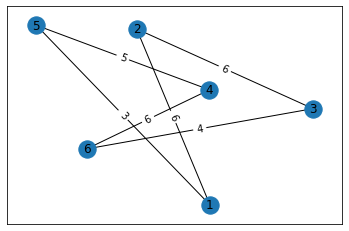

In [24]:
def to_hamiltonian(G):
  """
    Function that transforms an initial graph into a Hamiltonian graph using the most optimal algorithm produced by above algorithms

    Parameters
    ----------
    G : networkx.classes.graph.Graph
        Initial graph that needs to be transformed

    Returns
    -------
    G : G : networkx.classes.graph.Graph
        Hamiltonian graph based on the most optimal path produced by above algorithms

    """  
  edgesToRemove = []
  edgesToKeep = []
  index = 0
  for i in routes[0][1]:
    for k in list(G.edges(i)):
      try:
        if (k[0] == routes[0][1][index] and k[1] == routes[0][1][index+1]):
          edgesToKeep.append((k[0],k[1]))
        else:
          if (k[0],k[1]) not in edgesToKeep and (k[1],k[0]) not in edgesToKeep:
            edgesToRemove.append((k[0],k[1]))
      except:
        break
    index += 1
  for i in edgesToKeep:
    for k in edgesToRemove:
      if (i == k) or (i[0] == k[1] and i[1] == k[0]):
        edgesToRemove.remove(k)
  G.remove_edges_from(edgesToRemove)
  return G
routes.sort()
routes = routes[:1]
to_hamiltonian(G)
weights = nx.get_edge_attributes(G, "weight")
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)